In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Steps in Modelling with Tensorflow

**1) Creating a model**<br>
**2) Compiling a model**<br>
**3) Fitting a model**

In [72]:
# X = tf.constant(np.arange(0, 20, 2), dtype=tf.int16)
# y = tf.constant([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype=tf.int16)
# tf.size(X), tf.size(y)
X = np.arange(1,1000)
y = np.arange(1, 1998, 2)
# y == X * 2
X = tf.constant(X)
X= tf.reshape(X, shape=(999,1))
y = tf.constant(y)
# y = tf.reshape(y, shape=(9,1))

(<tf.Tensor: shape=(), dtype=int32, numpy=999>,
 <tf.Tensor: shape=(), dtype=int32, numpy=999>)

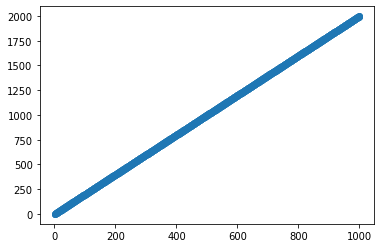

In [73]:
plt.scatter(X, y)
tf.size(X), tf.size(y)

In [74]:
# Create our model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation=None),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

In [75]:
# Compile our model
# tf.random.set_seed(42)

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adagrad(),
             metrics=["mae"])

In [76]:
# tf.random.set_seed(42)
model.fit(X, y, epochs=250, batch_size=100, verbose=0)

In [77]:
model.predict([2000])

array([[3999.3215]], dtype=float32)

## Practice

In [78]:
# Generate Dummy Data
tf.random.set_seed(42)
X = tf.constant(np.arange(0,10))
X = tf.reshape(X, shape=(10, 1))
y = tf.constant(np.arange(10,20))
y = tf.reshape(y, shape=(10, 1))
X.ndim, y.ndim, X.shape, y.shape

(2, 2, TensorShape([10, 1]), TensorShape([10, 1]))

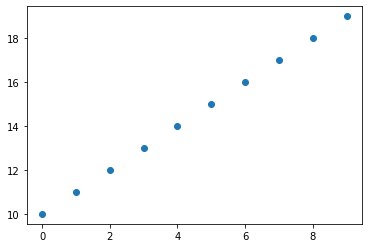

In [79]:
plt.scatter(X, y)

In [80]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [81]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.mae,
             metrics=["mae"])

In [82]:
model.fit(X, y, epochs=300, verbose=0)

In [83]:
X_input = [] 
y_predict = []
for i in range(50, 100, 2):
    X_input.append(i)
    y_predict.append(model.predict([i]))
    


In [84]:
X_input

[50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98]

In [85]:
y_predict

[array([[61.4574]], dtype=float32),
 array([[63.51364]], dtype=float32),
 array([[65.56988]], dtype=float32),
 array([[67.62611]], dtype=float32),
 array([[69.682335]], dtype=float32),
 array([[71.73858]], dtype=float32),
 array([[73.79481]], dtype=float32),
 array([[75.85104]], dtype=float32),
 array([[77.90727]], dtype=float32),
 array([[79.9635]], dtype=float32),
 array([[82.01973]], dtype=float32),
 array([[84.07596]], dtype=float32),
 array([[86.1322]], dtype=float32),
 array([[88.18842]], dtype=float32),
 array([[90.24465]], dtype=float32),
 array([[92.3009]], dtype=float32),
 array([[94.357124]], dtype=float32),
 array([[96.41336]], dtype=float32),
 array([[98.46959]], dtype=float32),
 array([[100.52582]], dtype=float32),
 array([[102.58206]], dtype=float32),
 array([[104.6383]], dtype=float32),
 array([[106.69452]], dtype=float32),
 array([[108.75076]], dtype=float32),
 array([[110.806984]], dtype=float32)]

In [86]:
X_input = np.array(X_input)
y_predict = np.array(y_predict)
X_input.ndim, y_predict.ndim

(1, 3)

In [87]:
y_predict = y_predict.reshape(25)
X_input.shape, y_predict.shape

((25,), (25,))

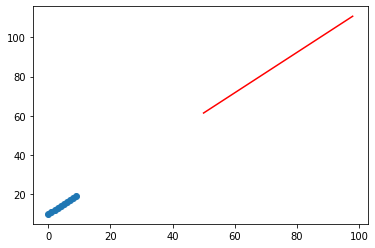

In [88]:
plt.plot(X_input, y_predict, color='r')
plt.scatter(X, y)

## Common ways to improve a deep model:
```
-> Adding layers
-> Increase the number of hidden units
-> Change the activation functions
-> Change the optimization function
-> Change the learning rate
-> Fitting on more data
-> Fitting for longer
```

## Exercise

In [89]:
df = pd.read_csv('data.csv')

In [90]:
X = df['hrs']
y = df['Grade']
X.shape, y.shape, X.ndim, y.ndim

((100,), (100,), 1, 1)

In [91]:
X.describe(), '=======================', y.describe()

(count    100.000000
 mean      48.958341
 std        9.746379
 min       25.128485
 25%       41.526164
 50%       49.634970
 75%       56.762631
 max       70.346076
 Name: hrs, dtype: float64,
 '=======================',
 count    100.000000
 mean      72.735051
 std       16.658187
 min       31.707006
 25%       60.788586
 50%       72.179542
 75%       83.215080
 max      118.591217
 Name: Grade, dtype: float64)

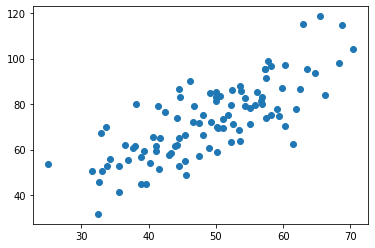

In [92]:
# Plotting the points
plt.scatter(X, y)

In [93]:
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

In [94]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss=tf.keras.losses.mae,
             metrics=['mae'])

In [95]:
model.fit(X, y, epochs=1000, verbose=0)

In [96]:
# df['hrs'][1]
df['hrs'][1], df['Grade'][1], model.predict([df['hrs'][1]])

(53.42680403327502, 68.77759598163891, array([[77.44582]], dtype=float32))

## Evaluating a model

Workflow when building a NN:
    
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...```

While building a model: ``` > "Experiment, Experiment, Experiment"```<br>
While evaluating a model: ``` > "Visualize, Visualize, Visualize"```

It's a good idea to visualize:
* **The data** - What data are we working with? What does it look like?
* **The model itself** - What does our model look like?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (The original labels)?

### Splitting the dataset into 3 sets...

* **Training set** - the model learns from this data, which is 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data which is 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, it is 10-15% of the data available

In [97]:
## Generating X and Y
X = tf.range(-200, 200, 4)
y = X + 5

In [98]:
len(X), len(y)

(100, 100)

In [99]:
# Splitting the dataset into train and test set
X_train = X[:80]
X_test = X[80:]

y_train = y[:80]
y_test = y[80:]

len(X_train), len(X_test), len(y_train), len(y_test), X_train.ndim, y_train.ndim

(80, 20, 80, 20, 1, 1)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([80]), TensorShape([20]), TensorShape([80]), TensorShape([20]))

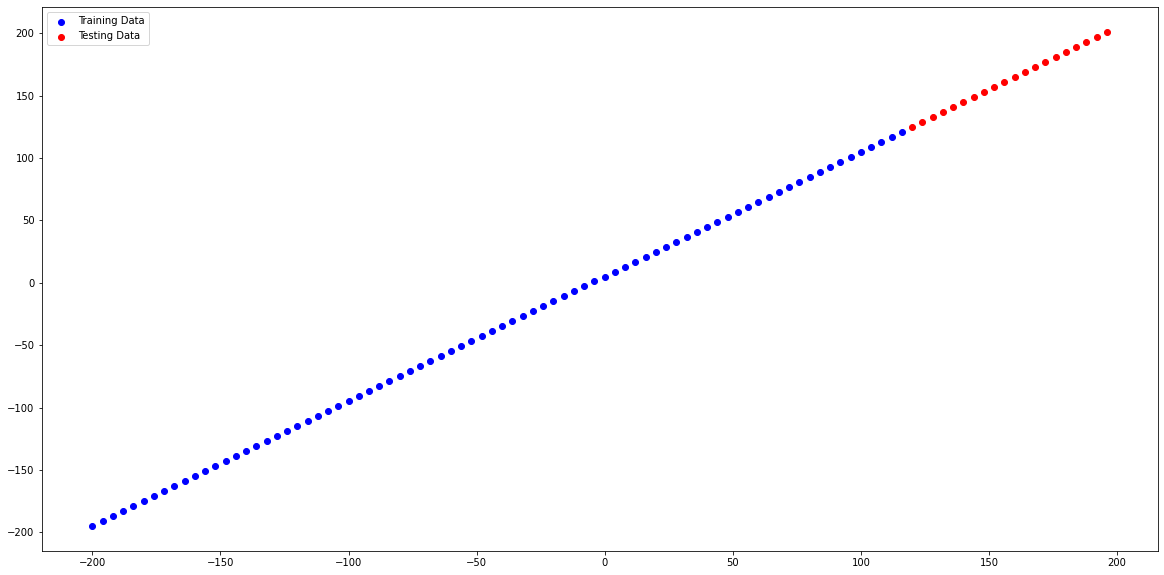

In [101]:
# Visualizing the Train, Test sets
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='r', label='Testing Data')
plt.legend()

In [102]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]), # Passing input_shape so the model builds automatically and outputs the summary before fitting model.summary()
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [103]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss=tf.keras.losses.mae,
             metrics=['mae'])

## Visualizing the model

In [104]:
model.summary()

# Change Dense layer parameters (# of layers, # of hidden units) for different model summary

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               200       
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


* Dense layer = Fully connected Layer
* Total params = total # of params in the model
* Trainable params = Weights matrix and Biases vector, (Patterns a model can update as it trains)
* Non-trainable params = Parameters that are not updated during training (this is typical when we bring already learnt patterns or params from other models during **Transfer Learning**)

In [105]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [106]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [107]:
model.predict([0])

array([[4.9949756]], dtype=float32)

## Visualizing our model's predictions

Plotting ground truth ```y_true/y_test``` versus model's prediction ```y_pred```

In [108]:
# Making some predictions
y_pred = model.predict(X_test)
y_pred

array([[125.54638],
       [129.56479],
       [133.58316],
       [137.60155],
       [141.61992],
       [145.63829],
       [149.6567 ],
       [153.67503],
       [157.69344],
       [161.71184],
       [165.73022],
       [169.74858],
       [173.76695],
       [177.78534],
       [181.80371],
       [185.8221 ],
       [189.8405 ],
       [193.85886],
       [197.87726],
       [201.8956 ]], dtype=float32)

In [109]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173,
       177, 181, 185, 189, 193, 197, 201], dtype=int32)>

In [110]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([125.54638, 129.56479, 133.58316, 137.60155, 141.61992, 145.63829,
       149.6567 , 153.67503, 157.69344, 161.71184, 165.73022, 169.74858,
       173.76695, 177.78534, 181.80371, 185.8221 , 189.8405 , 193.85886,
       197.87726, 201.8956 ], dtype=float32)>

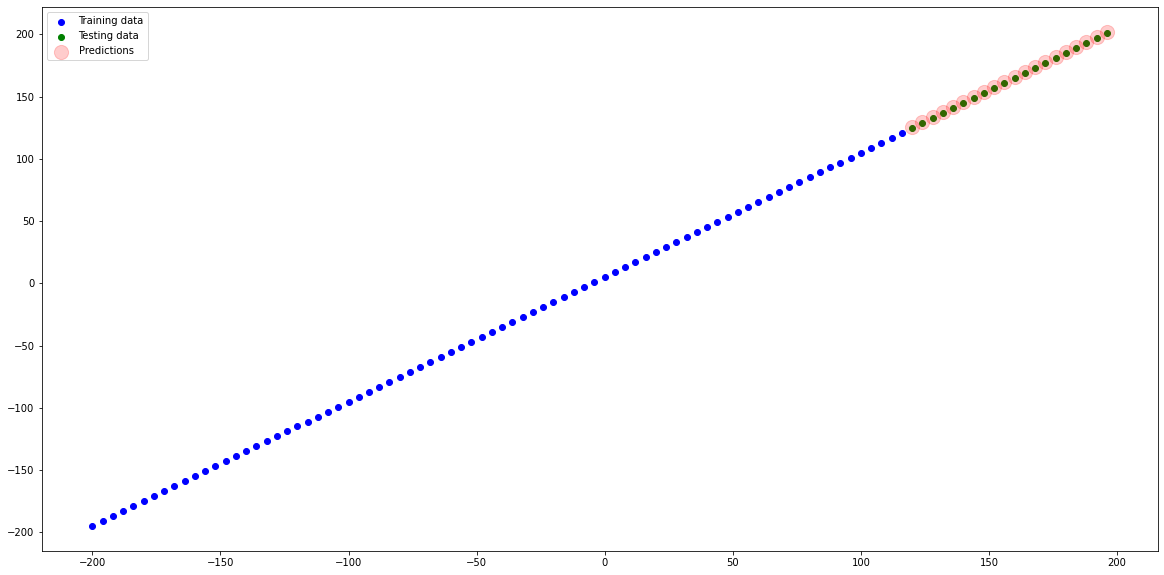

In [111]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.scatter(X_test, y_pred, c='r', label='Predictions', alpha=0.2, s=200)
plt.legend()

## Evaluating our model's predictions with regression evaluation metrics

* MAE - Mean Absolute Error, "On average, how wrong is each of our model's predictions"
* MSE - Mean Square Error, "Square the average error"

In [112]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 0.7210 - mae: 0.7210


[0.7210105657577515, 0.7210105657577515]

In [113]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7210102>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5310887>)

* **Machine Learning Explorer's motto** = "Visualize, Visualize, Visualize"<br>
* **Machine Learning Practitioner's motto** = "Experiment, Experiment, Experiment"

## Running experiments to improve our model

1. Get more data - get more examples for out model to train on
2. Make model larger - Use more complex model, more layers or mor hidden units in each layer
3. Train for longer - Give our model more of a chance to find patterns in data, more # of epochs

Doing 3 more modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [114]:
X = tf.range(-100, 100, 4)
y = X + 10

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train.ndim, y_train.ndim, X_test.ndim, y_test.ndim

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 1,
 1,
 1,
 1)

In [115]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [116]:
y_pred_1 = model_1.predict(X_test)

**Build `model_2`**

In [117]:
import os
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                 save_weights_only=True,
                                                 verbose=1)

In [118]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics=['mae'])

model_2.fit(X_train, y_train, epochs=50, verbose=0, callbacks=[cp_callback])


Epoch 1: saving model to training_3

Epoch 2: saving model to training_3

Epoch 3: saving model to training_3

Epoch 4: saving model to training_3

Epoch 5: saving model to training_3

Epoch 6: saving model to training_3

Epoch 7: saving model to training_3

Epoch 8: saving model to training_3

Epoch 9: saving model to training_3

Epoch 10: saving model to training_3

Epoch 11: saving model to training_3

Epoch 12: saving model to training_3

Epoch 13: saving model to training_3

Epoch 14: saving model to training_3

Epoch 15: saving model to training_3

Epoch 16: saving model to training_3

Epoch 17: saving model to training_3

Epoch 18: saving model to training_3

Epoch 19: saving model to training_3

Epoch 20: saving model to training_3

Epoch 21: saving model to training_3

Epoch 22: saving model to training_3

Epoch 23: saving model to training_3

Epoch 24: saving model to training_3

Epoch 25: saving model to training_3

Epoch 26: saving model to training_3

Epoch 27: saving mod

In [119]:
y_pred_2 = model_2.predict(X_test)
model_2.predict([-50])

array([[-53.040417]], dtype=float32)

**Build `model_3`**

In [120]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [121]:
y_pred_3 = model_3.predict(X_test)

In [122]:
# Plot Function

def show(X_train, X_test, y_train, y_test, y_pred, name):
    plt.figure(figsize=(20, 10))
    plt.scatter(X_train, y_train, c='b', label='Training data')
    plt.scatter(X_test, y_test, c='g', label='Testing data')
    plt.scatter(y_test, y_pred, c='r', label='Predictions')
    plt.title(name)
    plt.legend()
    
def mae(y_test, y_pred):
    return tf.losses.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.losses.mean_squared_error(y_test, y_pred)

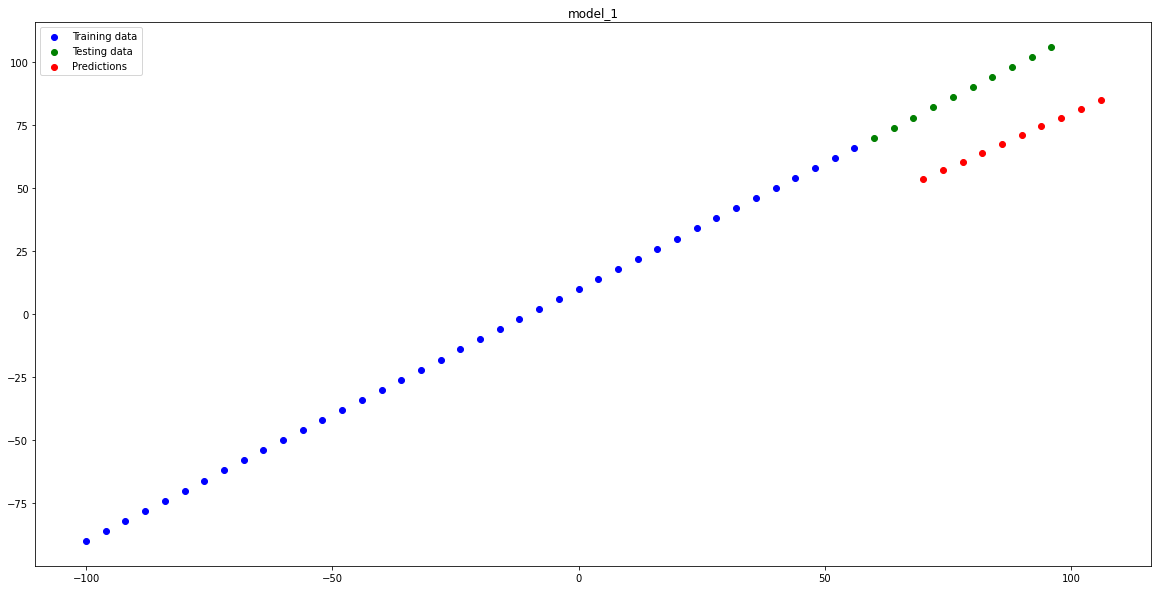

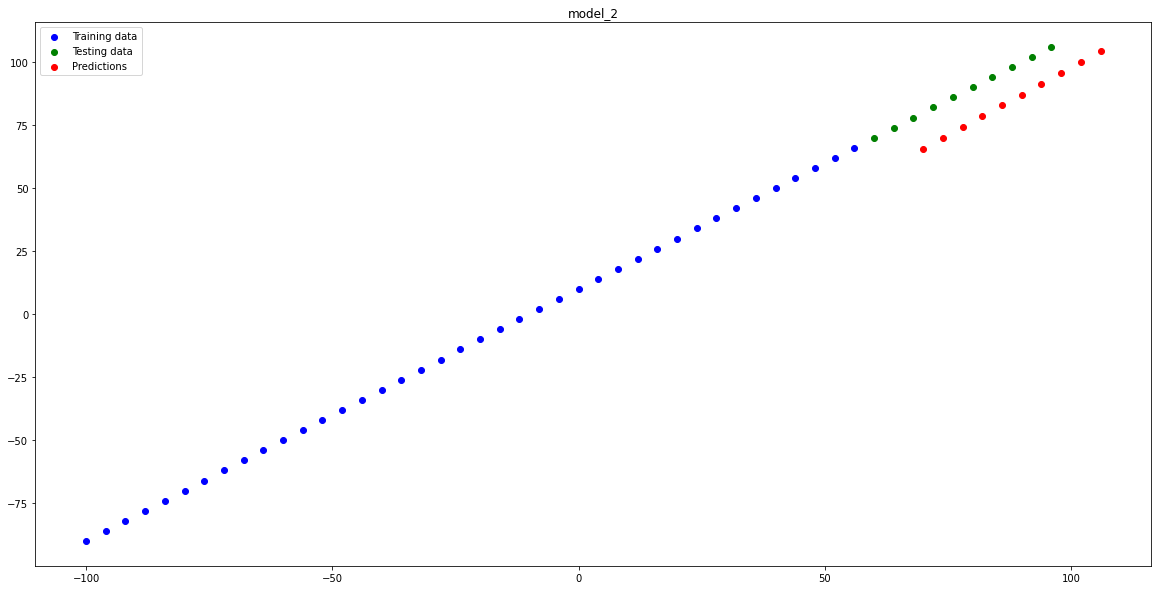

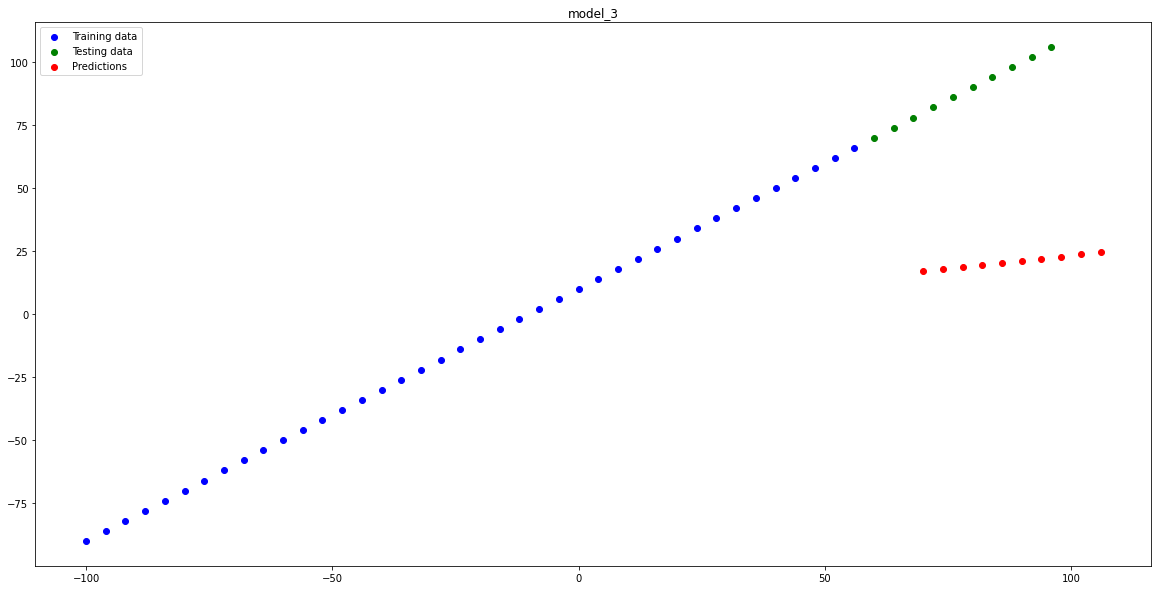

In [123]:
show(X_train, X_test, y_train, y_test, y_pred_1, 'model_1')
show(X_train, X_test, y_train, y_test, y_pred_2, 'model_2')
show(X_train, X_test, y_train, y_test, y_pred_3, 'model_3')

In [124]:
mae(y_test, tf.squeeze(y_pred_1)), mae(y_test, tf.squeeze(y_pred_2)), mae(y_test, tf.squeeze(y_pred_3))
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mae_3 = mae(y_test, tf.squeeze(y_pred_3))

In [125]:
mse(y_test, tf.squeeze(y_pred_1)), mse(y_test, tf.squeeze(y_pred_2)), mse(y_test, tf.squeeze(y_pred_3))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

## Comparing the results of our experiments

In [126]:
results = [['model_1', mae_1.numpy(), mse_1.numpy()],
          ['model_2', mae_2.numpy(), mse_2.numpy()],
          ['model_3', mae_3.numpy(), mse_3.numpy()]]

pd_results = pd.DataFrame(results, columns=['model', 'mae', 'mse'])
pd_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.049957,10.106365
2,model_3,67.219154,4601.054199


In [127]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               200       
                                                                 
 dense_27 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Tracking our Experiments

As machine learning practitioners' job is to 'Experiment, Experiment, Experiment' therefore it is a good practice to keep track of results.

There are tools that help us do that exactly.

**Resources**

* TensorBoard - A component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - A tool for tracking all kinds of learning ML experiments.

## Saving our Models

Saving our models allows us to use them outside the Google Colab

There are two main formats we can save our model's to:

1. The SavedModel format
2. The HDF5 format

In [128]:
model_2.save('model_1_SavedModel')

INFO:tensorflow:Assets written to: model_1_SavedModel/assets


In [129]:
model_2.save('model_1_tf', save_format='tf')

INFO:tensorflow:Assets written to: model_1_tf/assets


## Loading out Models

In [130]:
new_model_2_loaded = tf.keras.models.load_model('model_1_SavedModel')

In [131]:
new_model_2_loaded.predict([-50])

array([[-53.040417]], dtype=float32)

In [132]:
model_2.predict([-50])

array([[-53.040417]], dtype=float32)

In [133]:
model_2.predict(X_test) == new_model_2_loaded.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [134]:
# Loading HDF5 format
new_model_2_hdf5 = tf.keras.models.load_model('model_1_tf')

In [135]:
model_2.predict(X_test) == new_model_2_hdf5.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [136]:
new_model_2_loaded.fit(X_train, y_train, epochs=95, verbose=1)

Epoch 1/95
2/2 [==============================] - 0s 3ms/step - loss: 11.3251 - mae: 11.3251
Epoch 2/95
2/2 [==============================] - 0s 3ms/step - loss: 10.7382 - mae: 10.7382
Epoch 3/95
2/2 [==============================] - 0s 8ms/step - loss: 17.0955 - mae: 17.0955
Epoch 4/95
2/2 [==============================] - 0s 8ms/step - loss: 12.1950 - mae: 12.1950
Epoch 5/95
2/2 [==============================] - 0s 4ms/step - loss: 13.4525 - mae: 13.4525
Epoch 6/95
2/2 [==============================] - 0s 9ms/step - loss: 10.6942 - mae: 10.6942
Epoch 7/95
2/2 [==============================] - 0s 9ms/step - loss: 11.7288 - mae: 11.7288
Epoch 8/95
2/2 [==============================] - 0s 8ms/step - loss: 10.2274 - mae: 10.2274
Epoch 9/95
2/2 [==============================] - 0s 5ms/step - loss: 38.8711 - mae: 38.8711
Epoch 10/95
2/2 [==============================] - 0s 4ms/step - loss: 26.6099 - mae: 26.6099
Epoch 11/95
2/2 [==============================] - 0s 6ms/step - loss

In [137]:
new_model_2_hdf5.predict([-50])

array([[-53.040417]], dtype=float32)

In [138]:
y_pred_2_loaded = new_model_2_loaded.predict(X_test)

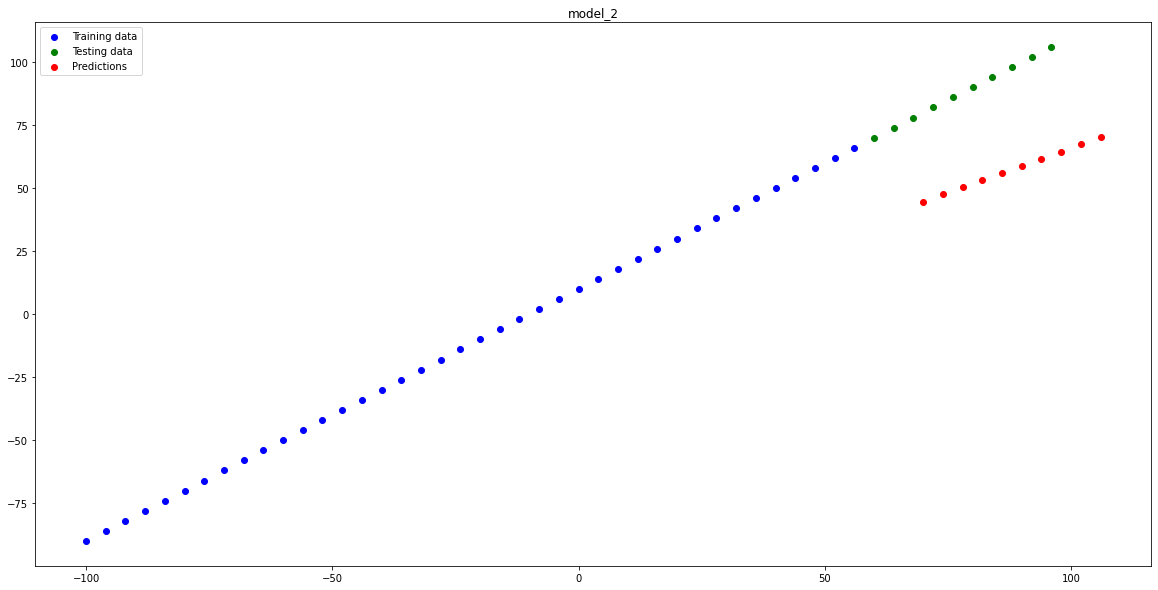

In [139]:
show(X_train, X_test, y_train, y_test, y_pred_2_loaded, 'model_2')

## Loading Weights for model 2

In [140]:
del model_W
tf.random.set_seed(42)
model_W = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_W.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001),
               metrics=['mae'])

NameError: name 'model_W' is not defined

In [ ]:
model_W.load_weights(checkpoint_path)

In [ ]:
model_W.predict([-50])

In [ ]:
model_W.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_W.predict([-50])

In [ ]:
y_pred_2_W = model_W.predict(X_test)

In [ ]:
show(X_train, X_test, y_train, y_test, y_pred_2_W, 'model_2')